# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Frida Kilby

Vem du har presenterat för: Girlie Razon, Magdalena Wallner, Alia Atawna

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from scipy import ndimage
import numpy as np

# import librarys as needed

In [2]:
model = ResNet50(weights='imagenet')

# download model ResNet50 with weights imagenet, the model has been pre-trained on classes in imagenet

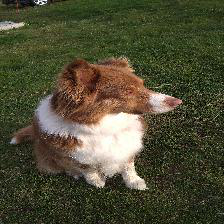

In [3]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
# img_path = 'bok.jpg'
img_path = 'hund.jpg'
# img_path = 'sko.jpg'
# img_path = 'pingstlilja.jpg'
# img_path = 'pussel.jpg'
# img_path = 'frisbee.jpg'
# img_path = 'nyckelpiga.jpg'
# img_path = 'jordgubb.jpg'
# img_path = 'frukt.jpg'
# img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img
# load in size 224 times 224 and show the image to be predicted

In [4]:
# See if rotate images and re-save them to fix the issue with them loading sidewise, which it did
# img = ndimage.rotate( img , 270 ) #rotate 270 degree
# image.save_img( img_path , img )

In [5]:
x = image.img_to_array(img)
x.shape

# creating an array called x from the image, printing it's shape

(224, 224, 3)

In [6]:
x = np.expand_dims(x, axis=0)
x.shape
# adding another dimension first in the array x

(1, 224, 224, 3)

In [7]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)
# preprocessing the image using a function from tensorflow, images returns converted from RGB to BGR and each color channel is zero-centered without scaling

In [8]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n02106030', 'collie', 0.34738144), ('n02102177', 'Welsh_springer_spaniel', 0.19141571), ('n02113186', 'Cardigan', 0.15896001)]


# 1. Take some pictures yourself and predict their class.

In [9]:
# Images before rotation and resaved

img_list = ['zebra_1.jpg', 'linjal_1.jpg', 'bok_1.jpg', 'hund_1.jpg', 'sko_1.jpg', 'pingstlilja_1.jpg',
            'pussel_1.jpg', 'frisbee_1.jpg', 'nyckelpiga_1.jpg', 'jordgubb_1.jpg', 'frukt_1.jpg', 'tennisboll_1.jpg']
for i in img_list:
    img_path = i
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(img_path)
    print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
zebra_1.jpg
Predicted: [('n02391049', 'zebra', 0.9864265), ('n02423022', 'gazelle', 0.0034377116), ('n01798484', 'prairie_chicken', 0.0029412836)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
linjal_1.jpg
Predicted: [('n03777754', 'modem', 0.6294263), ('n04118776', 'rule', 0.13824037), ('n03494278', 'harmonica', 0.07477257)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
bok_1.jpg
Predicted: [('n06794110', 'street_sign', 0.31515104), ('n02786058', 'Band_Aid', 0.042605724), ('n04116512', 'rubber_eraser', 0.03811397)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
hund_1.jpg
Predicted: [('n02102177', 'Welsh_springer_spaniel', 0.20195042), ('n02123045', 'tabby', 0.11855906), ('n02101388', 'Brittany_spaniel', 0.115404814)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
sko_1.jpg
Predicted: [('n04090263', 'rifle', 0.2499204), ('n03584829', 'iron', 0.16156386), ('n04086273', 'revolver', 0.07514326)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
pingstlilja_1.jpg
Predicted: [('n07716358', 'z

In [10]:
# Pictures after rotation, which gives me at least some more hits

img_list = ['zebra.jpg', 'linjal.jpg', 'bok.jpg', 'hund.jpg', 'sko.jpg',
            'pingstlilja.jpg', 'pussel.jpg', 'frisbee.jpg', 'nyckelpiga.jpg', 'jordgubb.jpg', 'frukt.jpg', 'tennisboll.jpg']
for i in img_list:
    img_path = i
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(img_path)
    print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
zebra.jpg
Predicted: [('n02391049', 'zebra', 0.9864265), ('n02423022', 'gazelle', 0.0034377116), ('n01798484', 'prairie_chicken', 0.0029412836)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
linjal.jpg
Predicted: [('n03777754', 'modem', 0.6294263), ('n04118776', 'rule', 0.13824037), ('n03494278', 'harmonica', 0.07477257)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
bok.jpg
Predicted: [('n03223299', 'doormat', 0.93060154), ('n03871628', 'packet', 0.016501071), ('n06794110', 'street_sign', 0.007335894)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
hund.jpg
Predicted: [('n02106030', 'collie', 0.34738144), ('n02102177', 'Welsh_springer_spaniel', 0.19141571), ('n02113186', 'Cardigan', 0.15896001)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
sko.jpg
Predicted: [('n04133789', 'sandal', 0.3152026), ('n03047690', 'clog', 0.28891972), ('n03680355', 'Loafer', 0.19404018)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
pingstlilja.jpg
Predicted: [('n11939491', 'daisy', 0.19359641), ('n03991

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

In [11]:
'''
Source: https://www.tensorflow.org/tutorials/images/transfer_learning

The pretrained model is a saved network that was trained on a large dataset.
Usually on a large-scale image-classification task.
You can choose between to use the pretrained model or use tranfer learning to customize the model.
If a model is trained on a large and general dataset, the model can serve as a generic model of the visual world.
So you can take advantage of the learned features without having to start from scratch by traning a large model on a large
dataset.

You save time training the model and you save time not having to fetch and prepare the dataset or classes.

In this code we use one of the recomended models for image classification. Two other are MobileNet V2 and VGG19.

If you print out the summary for ResNet50 you will get a good look at why a pretrained model is powerful.
The model of ResNet50 has 25 636 712 params and 107 layers. The top-1 accuarcy is 74,9 % and the top-5 accuarcy is 92,1 %.
(according to https://keras.io/api/applications/#usage-examples-for-image-classification-models)
The layers are Conv2D, Padding, BatchNormalization and more on. 
'''

'\nSource: https://www.tensorflow.org/tutorials/images/transfer_learning\n\nThe pretrained model is a saved network that was trained on a large dataset.\nUsually on a large-scale image-classification task.\nYou can choose between to use the pretrained model or use tranfer learning to customize the model.\nIf a model is trained on a large and general dataset, the model can serve as a generic model of the visual world.\nSo you can take advantage of the learned features without having to start from scratch by traning a large model on a large\ndataset.\n\nYou save time training the model and you save time not having to fetch and prepare the dataset or classes.\n\nIn this code we use one of the recomended models for image classification. Two other are MobileNet V2 and VGG19.\n\nIf you print out the summary for ResNet50 you will get a good look at why a pretrained model is powerful.\nThe model of ResNet50 has 25 636 712 params and 107 layers. The top-1 accuarcy is 74,9 % and the top-5 accuar

In [12]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)